In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [14]:
my_data_set = pd.read_csv('C:\\Users\\Asus\\Desktop\\dry_bean_dataset.csv')

In [15]:
my_data_set

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


   Sample  Best Accuracy Best Kernel Value  Best C Value  Best Gamma Value
0       1           0.88               rbf           1.0              0.01
1       2           0.87               rbf           1.0              1.00
2       3           0.88               rbf           1.0              1.00
3       4           0.87               rbf           1.0              0.01
4       5           0.88               rbf           0.1              0.10
5       6           0.87               rbf           1.0              0.10
6       7           0.87               rbf           1.0              0.01
7       8           0.88               rbf           1.0              0.01
8       9           0.88               rbf           0.1              0.10
9      10           0.86               rbf           0.1              1.00


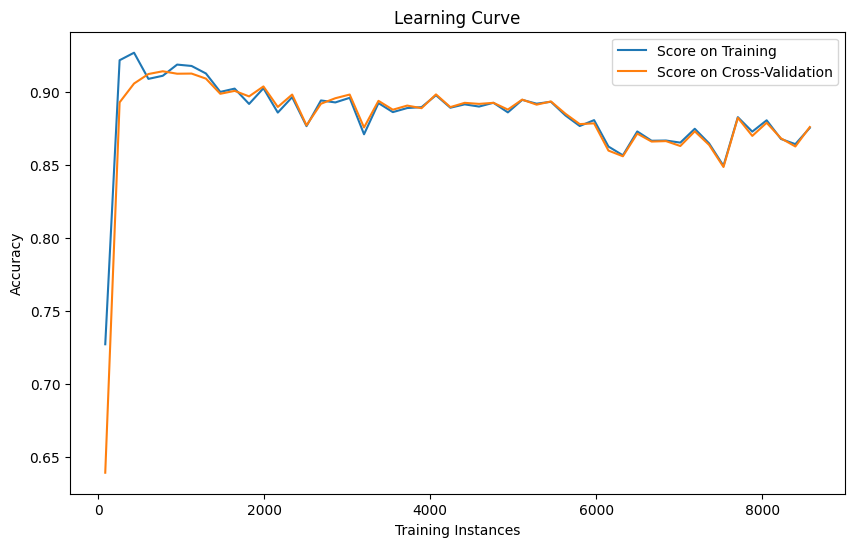

In [18]:
# Encode target variable
label_encoder = LabelEncoder()
class_labels = ["SEKER", "BARBUNYA", "BOMBAY","CALI","HOROZ","SIRA","DERMASON"]
label_encoder.fit(class_labels)
my_data_set["Class"] = label_encoder.transform(my_data_set["Class"])

def preprocess_data(dataset):
    X = dataset.iloc[:, :-1]
    y = dataset['Class']
    ss = StandardScaler()
    X = ss.fit_transform(X)
    return X, y

def tune_svm(X_train, y_train):
    param_grid = {
        'C': np.logspace(-3, 3, 7),
        'gamma': np.logspace(-3, 3, 7),
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    }
    grid_search = GridSearchCV(SVC(max_iter=100), param_grid, cv=10, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_, grid_search.best_score_

def plot_learning_curve(X_train, y_train, best_params):
    svm = SVC(**best_params, max_iter=100)
    train_sizes, train_scores, test_scores = learning_curve(svm, X_train, y_train, cv=10, scoring='accuracy',
                                                            train_sizes=np.linspace(0.01, 1.0, 50))
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Score on Training')
    plt.plot(train_sizes, test_mean, label='Score on Cross-Validation')
    plt.xlabel('Training Instances')
    plt.ylabel('Accuracy')
    plt.title('Learning Curve')
    plt.legend(loc="best")
    plt.show()

def main():
    X, y = preprocess_data(my_data_set)
    samples = []
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
        samples.append((X_train, X_test, y_train, y_test))

    result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel Value', 'Best C Value', 'Best Gamma Value'])
    for i, (X_train, X_test, y_train, y_test) in enumerate(samples, start=1):
        best_params, best_score = tune_svm(X_train, y_train)
        result.loc[i - 1] = [i, round(best_score, 2), best_params['kernel'], round(best_params['C'], 2),
                             round(best_params['gamma'], 2)]

    print(result)

    best_params = {'kernel': result['Best Kernel Value'].iloc[result['Best Accuracy'].idxmax()],
                   'C': result['Best C Value'].iloc[result['Best Accuracy'].idxmax()],
                   'gamma': result['Best Gamma Value'].iloc[result['Best Accuracy'].idxmax()]}

    X_train, _, y_train, _ = samples[result['Best Accuracy'].idxmax()]
    plot_learning_curve(X_train, y_train, best_params)

if __name__ == "__main__":
    main()


In [19]:
train_sizes, train_scores, test_scores = learning_curve(svm, X_train, y_train, cv=10, scoring='accuracy',train_sizes=np.linspace(0.01, 1.0, 50))
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Score on Training')
plt.xlabel('Training')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.show()

NameError: name 'train_sizes' is not defined

<Figure size 1000x600 with 0 Axes>